In [8]:
## Pre-requisite imports use this since the module for ospybook ##
## is depreciated all of the codes produces an error without exception ##
## as per dubugging the module ill be uploading updated module for this coursecode ##

import os #be sure to import this if using vs to access files
import sys
from osgeo import ogr 
import geopandas as gpd
import matplotlib.pyplot as plt

## <-- END --> ##

###### FILES DIRECTORY #####

data_dir = r'C:\Users\dieux.iii\Documents\4th Year Graduating Yey\Geomatics\Data Source\osgeopy-data'
data_path_global = r"C:\Users\dieux.iii\Documents\4th Year Graduating Yey\Geomatics\Data Source\osgeopy-data\osgeopy-data-global\osgeopy-data\global\ne_50m_admin_0_countries.shp"
# Set the path to your shapefile
world = gpd.read_file(data_path_global)


##### <---- END ----> #####

0          Aruba
1    Afghanistan
2         Angola
3       Anguilla
Name: name, dtype: object


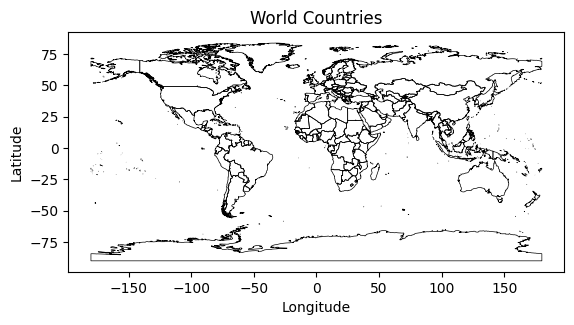

In [9]:
##### Number 1 #####

# plot the countries from th shp
fig, ax = plt.subplots()
world.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)

# Retrieve by attributes be sure to check the file headers
print(world['name'].head(4))

# UI Plot
ax.set_title('World Countries')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

##### <----- END ----> #####


1              Afghanistan
7     United Arab Emirates
9                  Armenia
17              Azerbaijan
Name: name, dtype: object
8     Argentina
31      Bolivia
32       Brazil
40        Chile
Name: name, dtype: object


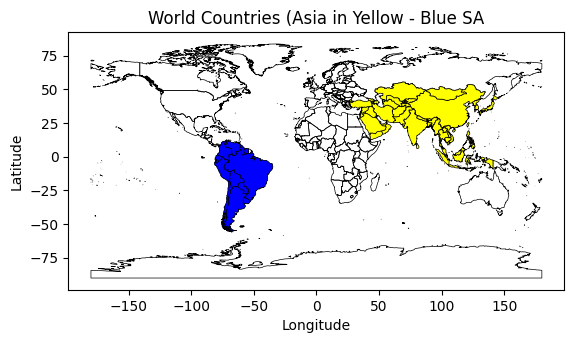

In [10]:
##### Number 2 & 3 #####

# Filtering the Asia from the continent based on the string 'Asia' == to be sure the exact string
asian_countries = world[world['continent'] == 'Asia']
south_america = world[world['subregion'] == 'South America']

# Since the world cant overlay just remove the Asia continent from the world since we'll be assigning yellow
non_asian_countries = world[~world['continent'].isin(['Asia'])]  # Filter using negation (~) and isin()
non_asian_countries.plot(ax=plt.gca(), facecolor='none', edgecolor='black', linewidth=0.5)

# To overlay - Plot Asian countries last for visibility
asian_countries.plot(ax=plt.gca(), facecolor='yellow', edgecolor='black', linewidth=0.5)

# In overlaying the subregion south america
south_america.plot(ax=plt.gca(), facecolor='blue', edgecolor='black', linewidth=0.4) #For number 3

# Retrieve by attributes be sure to check the file headers
print(asian_countries['name'].head(4))

#print the SA countries
print(south_america['name'].head(4)) #For number 3

# Own preferences in customizing the figure plot
ax = plt.gca()  # Get current axis for title, labels
ax.set_title('World Countries (Asia in Yellow - Blue SA')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

##### <--- END ---> #####

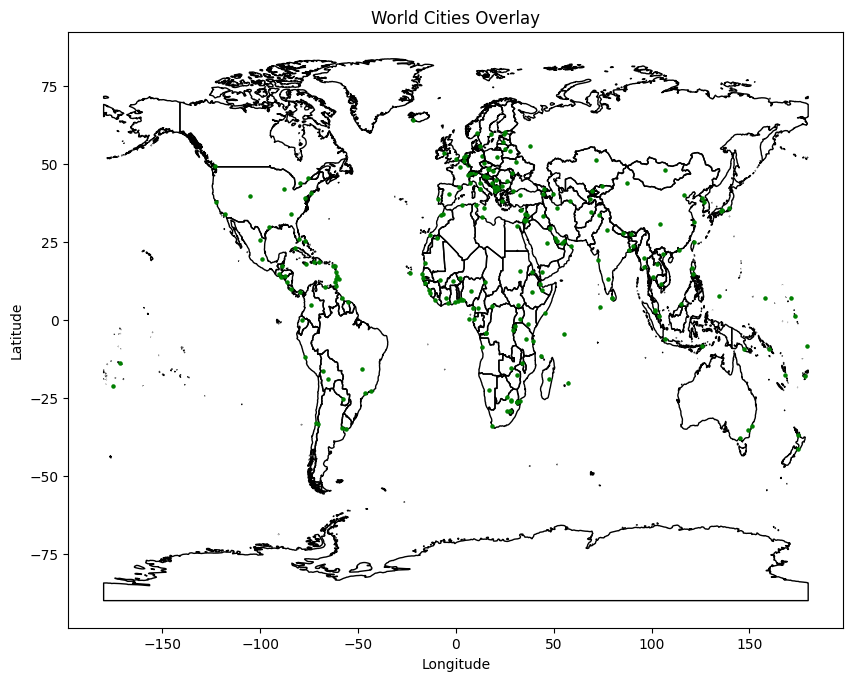

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Set the file paths
cities_path = r"C:\Users\dieux.iii\Documents\4th Year Graduating Yey\Geomatics\Data Source\osgeopy-data\osgeopy-data-global\osgeopy-data\global\ne_110m_populated_places_simple.shp"
world_path = r"C:\Users\dieux.iii\Documents\4th Year Graduating Yey\Geomatics\Data Source\osgeopy-data\osgeopy-data-global\osgeopy-data\global\ne_50m_admin_0_countries.shp"

#Filter out the germany
germany = world[world['sovereignt'] == 'Germany']


# Read the shapefiles into GeoDataFrames
cities = gpd.read_file(cities_path)
world = gpd.read_file(world_path)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the world shapefile with no fill and black outline
world.plot(ax=ax, facecolor='none', edgecolor='black')

# Overlay the cities on the plot
cities.plot(ax=ax, markersize=5, color='green')

# Add the Germany polygon to the plot
germany.plot(ax=ax, facecolor='none', edgecolor='black')

# Customize the plot
ax.set_title('World Cities Overlay')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


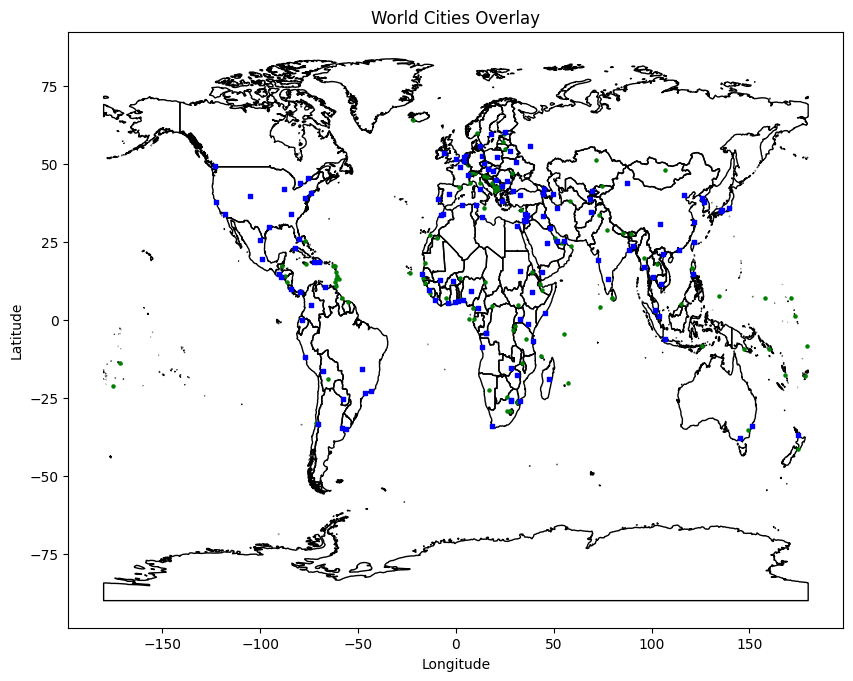

In [12]:

# Set the file paths
cities_path = r"C:\Users\dieux.iii\Documents\4th Year Graduating Yey\Geomatics\Data Source\osgeopy-data\osgeopy-data-global\osgeopy-data\global\ne_110m_populated_places_simple.shp"
world_path = r"C:\Users\dieux.iii\Documents\4th Year Graduating Yey\Geomatics\Data Source\osgeopy-data\osgeopy-data-global\osgeopy-data\global\ne_50m_admin_0_countries.shp"

#SINCE THE CITIES HAS A POPULATION ATTRIBUTE OF 1000000 then we filter it out to the cities
cities_greater_than_1m = cities[cities['pop_max'] > 1000000]

#Filter out the germany although this is not neccessary since we needed the cities not just within the
# germany but also the cities with a population of 1m
germany = world[world['sovereignt'] == 'Germany']

# Filter the cities within Germany with a population over 1,000,000
german_cities = cities[(cities['adm0name'] == 'Germany') & (cities['pop_max'] > 1000000)]


# Read the shapefiles into GeoDataFrames
cities = gpd.read_file(cities_path)
world = gpd.read_file(world_path)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the world shapefile with no fill and black outline
world.plot(ax=ax, facecolor='none', edgecolor='black')

# Overlay the cities on the plot
cities.plot(ax=ax, markersize=5, color='green')

# Overlay the cities on the plot as blue squares
cities_greater_than_1m.plot(ax=ax, markersize=10, color='blue', marker='s')

# Add the Germany polygon to the plot
germany.plot(ax=ax, facecolor='none', edgecolor='black')

# Customize the plot
ax.set_title('World Cities Overlay')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()


NameError: name 'bbox' is not defined

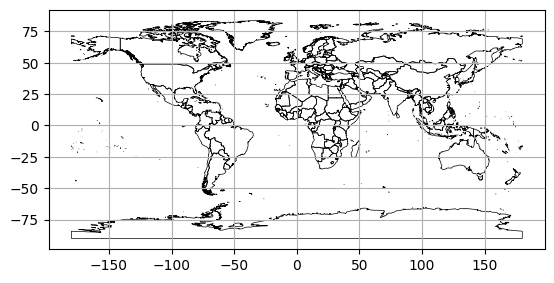

In [13]:
from matplotlib.patches import Rectangle

# Replot the countries with adjusted limits
fig, ax = plt.subplots()
world.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.5)

# Add grid
ax.grid(True)

# Adjust the limits of the x-axis and y-axis
ax.set_xlim(bbox[0]-10, bbox[2]+10)
ax.set_ylim(bbox[1]-10, bbox[3]+10)

# Add bounding box to Australia
bbox_rect = Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=1.5, edgecolor='red', facecolor='none')
ax.add_patch(bbox_rect)

# Add name for the bounding box in the center
center_lat = (bbox[1] + bbox[3]) / 2
center_lon = (bbox[0] + bbox[2]) / 2
bbox_name = 'Australia'  # Replace with the actual name of the bounding box
ax.text(center_lon, center_lat, bbox_name, ha='center', va='center', color='red')

# Customize the plot
ax.set_title('World Countries with Bounding Box')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


# Show the plot
plt.show()


In [ ]:
from osgeo import ogr

# Set the path to the shapefile
shapefile_path = r"C:\Users\dieux.iii\Documents\4th Year Graduating Yey\Geomatics\Data Source\osgeopy-data\osgeopy-data-global\osgeopy-data\global\ne_50m_admin_0_countries.shp"

# Open the shapefile
ds = ogr.Open(shapefile_path)

# Execute the SQL query
sql = "SELECT * FROM ne_50m_admin_0_countries ORDER BY pop_est DESC LIMIT 3"
layer = ds.ExecuteSQL(sql)

# Print the names and populations of the top 3 countries
for feature in layer:
    print(f"Country: {feature.GetField('name')}, Population: {feature.GetField('pop_est')}")

Country: China, Population: 1338612970.0
Country: India, Population: 1166079220.0
Country: United States, Population: 313973000.0


In [ ]:
import os
import sys
from osgeo import ogr
import ospybook as pb
from ospybook.vectorplotter import VectorPlotter
import pandas as pd
import matplotlib.pyplot as plt


data_dir = r'C:\Users\dieux.iii\Documents\4th Year Graduating Yey\Geomatics\Data Source\osgeopy-data\osgeopy-data-global\osgeopy-data'

# Join the populated places and country shapefiles together so that you can
# see information about cities but also the countries that they're in, at the
# same time. This uses the default OGR dialect.
ds = ogr.Open(os.path.join(data_dir, 'global'))
sql = '''SELECT pp.name AS city, pp.pop_min AS city_pop,
             c.name AS country, c.pop_est AS country_pop
         FROM ne_50m_populated_places pp
         LEFT JOIN ne_50m_admin_0_countries c
         ON pp.adm0_a3 = c.adm0_a3
         WHERE pp.adm0cap = 1'''
lyr = ds.ExecuteSQL(sql)
pb.print_attributes(lyr, 3, geom=False)


FID    city            city_pop    country          country_pop    
7      Vatican City    832         Vatican          832.0          
48     San Marino      29000       San Marino       30324.0        
51     Vaduz           5342        Liechtenstein    34761.0        
3 of 200 features


In [ ]:

ds = ogr.Open(os.path.join(data_dir, 'global'))
sql = '''SELECT pp.name AS city, pp.pop_min AS city_pop,
             c.name AS country, c.pop_est AS country_pop
         FROM ne_50m_populated_places pp
         LEFT JOIN ne_50m_admin_0_countries c
         ON pp.adm0_a3 = c.adm0_a3
         WHERE pp.adm0cap = 1 AND c.continent = "South America"'''
lyr = ds.ExecuteSQL(sql, dialect='SQLite')
pb.print_attributes(lyr, 3)


FID    city          city_pop    country     country_pop    
0      Montevideo    5324        Uruguay     3494382.0      
1      Georgetown    235017      Guyana      772298.0       
2      Paramaribo    223757      Suriname    481267.0       
3 of 13 features


In [14]:
import os

# FILEPATH: /c:/Users/dieux.iii/Documents/4th Year Graduating Yey/Geomatics/VS Geomatics/Chapter 5.ipynb
data_dir = r'C:\Users\dieux.iii\Documents\4th Year Graduating Yey\Geomatics\Data Source\osgeopy-data\osgeopy-data-global\osgeopy-data'

# Use a filter and CopyLayer to easily copy all capital cities to a new shapefile.
ds = ogr.Open(os.path.join(data_dir, 'global'), 1)

# Open the global cities shapefile and set a filter for capital cities.
in_lyr = ds.GetLayer('ne_50m_populated_places')
in_lyr.SetAttributeFilter("FEATURECLA = 'Admin-0 capital'")

# Copy the filtered layer to a new shapefile.
out_lyr = ds.CopyLayer(in_lyr, 'capital_cities2')
out_lyr.SyncToDisk()

# Check if the file was created
file_path = os.path.join(data_dir, 'capital_cities2.shp')
if os.path.exists(file_path):
    print("File created successfully!")
else:
    print("File already exist.")


File already exist.


In [15]:
import os

# Set the file path for the new shapefile
file_path = os.path.join(data_dir, 'capital_cities3.shp')

# Check if the file already exists
if os.path.exists(file_path):
    print("File already exists.")
else:
    # Use ExecuteSQL to pull out just a few attributes and copy that to a new shapefile.
    sql = """SELECT NAME, ADM0NAME FROM ne_50m_populated_places
             WHERE FEATURECLA = 'Admin-0 capital'"""
    in_lyr2 = ds.ExecuteSQL(sql)
    out_lyr2 = ds.CopyLayer(in_lyr2, 'capital_cities3')
    out_lyr2.SyncToDisk()

    # Check if the file was created
    if os.path.exists(file_path):
        print("File created successfully!")
    else:
        print("File creation exist.")


File creation exist.
